## Over Sampled Data using Smote

In [1]:
import pandas as pd
import seaborn as sns
file = pd.read_csv("data.csv")

In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [3]:
file.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Checking for null values and data shape

In [4]:
print(file.isnull().values.any())
print(file.shape)

False
(6819, 96)


### Ploting bankrupt column

C:\Users\IBRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

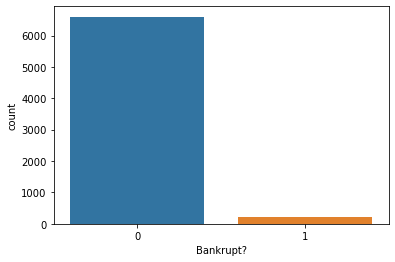

In [5]:
## Data needs to be balanced
sns.countplot(file['Bankrupt?'], label = "Count")

### Data Balancing

In [6]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import RandomUnderSampler


In [7]:
X = file.iloc[:,1:]
Y = file.iloc[:,0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [9]:
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 4622, 1: 4622})


C:\Users\IBRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

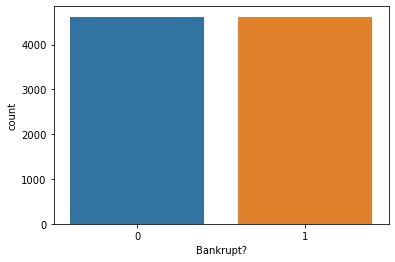

In [10]:
sns.countplot(y_train_SMOTE, label = "Count")

### Feature Selection using filters

#### Chi2 

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = X_train_SMOTE
Y = y_train_SMOTE
best = SelectKBest(score_func=chi2,k=10)
fit = best.fit(X,Y) 

In [12]:
dfscore = pd.DataFrame(fit.scores_)
dfcol = pd.DataFrame(X.columns)

In [13]:
featurescore = pd.concat([dfcol,dfscore], axis = 1)
featurescore.columns = ["feat","Score"]

In [14]:
featurescore

,feat,Score
0,ROA(C) before interest and depreciation befor...,40.868073
1,ROA(A) before interest and % after tax,50.381600
2,ROA(B) before interest and depreciation after...,42.299044
3,Operating Gross Margin,0.391075
4,Realized Sales Gross Margin,0.388582
...,...,...
90,Liability to Equity,2.431248
91,Degree of Financial Leverage (DFL),0.003931
92,Interest Coverage Ratio (Interest expense to ...,0.000222
93,Net Income Flag,0.000000


In [15]:
selectedfeat = featurescore.nlargest(10,"Score")
cols = selectedfeat["feat"]
print(cols)

58                    Cash/Current Liability
48           Fixed Assets Turnover Frequency
11     Research and development expense rate
71                 Quick Asset Turnover Rate
28                   Total Asset Growth Rate
29                     Net Value Growth Rate
86                 Total assets to GNP price
73                        Cash Turnover Rate
10                    Operating Expense Rate
75                    Fixed Assets to Assets
Name: feat, dtype: object


### Using KNN Classifier

In [16]:
from ipynb.fs.full.LearningAlg import *

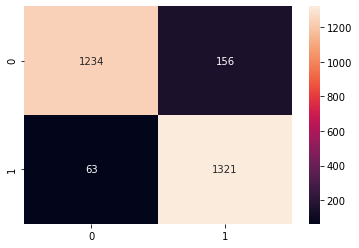

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1390
           1       0.89      0.95      0.92      1384

    accuracy                           0.92      2774
   macro avg       0.92      0.92      0.92      2774
weighted avg       0.92      0.92      0.92      2774



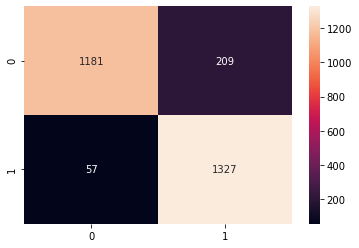

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1390
           1       0.86      0.96      0.91      1384

    accuracy                           0.90      2774
   macro avg       0.91      0.90      0.90      2774
weighted avg       0.91      0.90      0.90      2774



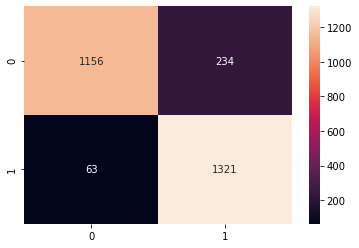

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1390
           1       0.85      0.95      0.90      1384

    accuracy                           0.89      2774
   macro avg       0.90      0.89      0.89      2774
weighted avg       0.90      0.89      0.89      2774



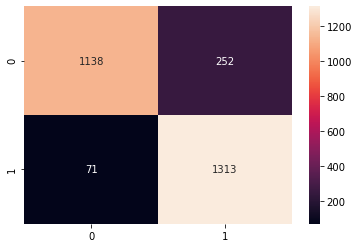

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1390
           1       0.84      0.95      0.89      1384

    accuracy                           0.88      2774
   macro avg       0.89      0.88      0.88      2774
weighted avg       0.89      0.88      0.88      2774



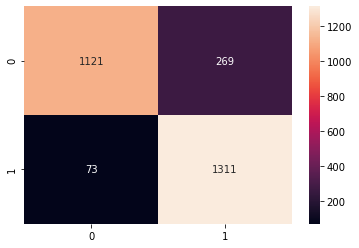

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1390
           1       0.83      0.95      0.88      1384

    accuracy                           0.88      2774
   macro avg       0.88      0.88      0.88      2774
weighted avg       0.88      0.88      0.88      2774



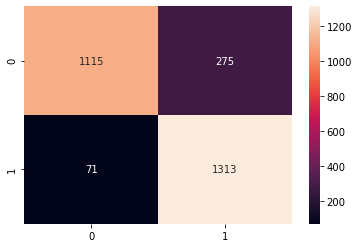

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1390
           1       0.83      0.95      0.88      1384

    accuracy                           0.88      2774
   macro avg       0.88      0.88      0.87      2774
weighted avg       0.88      0.88      0.87      2774



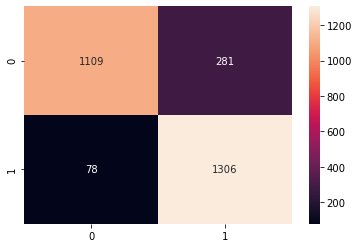

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1390
           1       0.82      0.94      0.88      1384

    accuracy                           0.87      2774
   macro avg       0.88      0.87      0.87      2774
weighted avg       0.88      0.87      0.87      2774



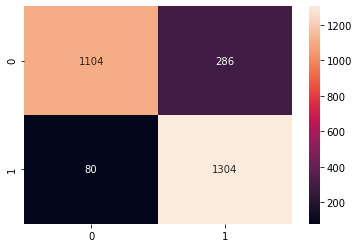

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1390
           1       0.82      0.94      0.88      1384

    accuracy                           0.87      2774
   macro avg       0.88      0.87      0.87      2774
weighted avg       0.88      0.87      0.87      2774



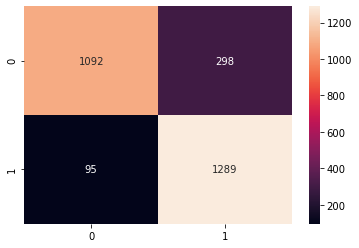

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1390
           1       0.81      0.93      0.87      1384

    accuracy                           0.86      2774
   macro avg       0.87      0.86      0.86      2774
weighted avg       0.87      0.86      0.86      2774



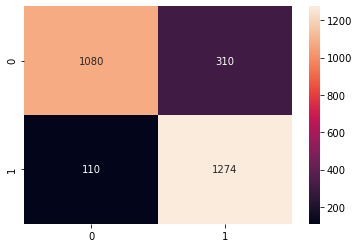

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1390
           1       0.80      0.92      0.86      1384

    accuracy                           0.85      2774
   macro avg       0.86      0.85      0.85      2774
weighted avg       0.86      0.85      0.85      2774



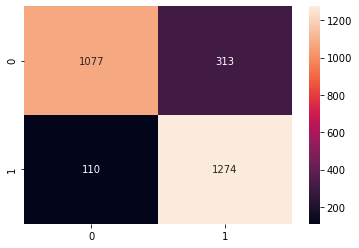

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1390
           1       0.80      0.92      0.86      1384

    accuracy                           0.85      2774
   macro avg       0.86      0.85      0.85      2774
weighted avg       0.86      0.85      0.85      2774



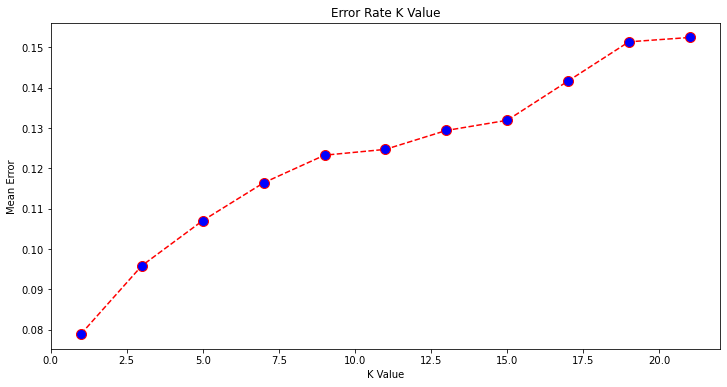

In [17]:
KNNclassifier(X_train_SMOTE[cols], y_train_SMOTE)

## Decision Trees Classifier

Accuracy: 0.9264599855803893


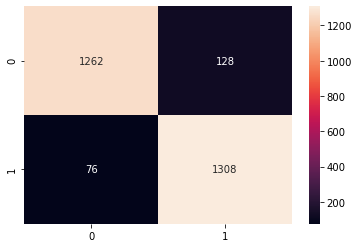

In [18]:
decisionTrees(X_train_SMOTE[cols], y_train_SMOTE)

## SVM

In [19]:
from ipynb.fs.full.LearningAlg import *

In [20]:
SVMalg(X_train_SMOTE[cols], y_train_SMOTE)

[[1075  315]
 [ 196 1188]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1390
           1       0.79      0.86      0.82      1384

    accuracy                           0.82      2774
   macro avg       0.82      0.82      0.82      2774
weighted avg       0.82      0.82      0.82      2774



### Using MLP Classifier

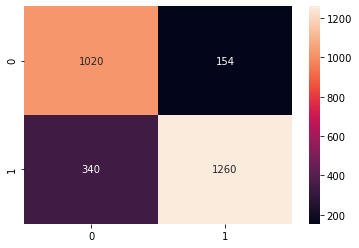

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1360
           1       0.79      0.89      0.84      1414

    accuracy                           0.82      2774
   macro avg       0.83      0.82      0.82      2774
weighted avg       0.83      0.82      0.82      2774



In [21]:
MLPclass(X_train_SMOTE[cols],y_train_SMOTE)

### Feature selection Using Extra Trees Classifier

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [23]:
print(model.feature_importances_)

[2.48579857e-02 3.21763433e-02 4.58845411e-02 5.05613093e-03
 8.00889114e-03 7.82929656e-03 5.66880386e-03 6.00859041e-03
 5.65380279e-03 5.78822983e-03 6.58380873e-03 6.03351352e-03
 4.63223975e-03 7.10650800e-03 1.47764529e-02 1.82313396e-02
 1.83721272e-02 1.88491179e-02 2.27452153e-02 7.47188848e-03
 5.34179207e-03 1.54360143e-02 1.43296542e-02 3.62787915e-03
 3.08970412e-03 3.35026996e-03 3.48813611e-03 3.91280360e-03
 1.68973956e-02 4.57397388e-03 5.01612340e-03 4.10844895e-03
 5.44559559e-03 6.60315713e-03 4.85978041e-03 6.12089171e-03
 5.04715161e-02 5.01080717e-02 3.26212252e-03 2.05599366e-02
 3.67821239e-03 1.91731763e-02 2.34545897e-02 7.60865595e-03
 7.31001265e-03 3.16859126e-03 5.60740854e-03 9.43325473e-03
 8.34225776e-03 4.61800039e-03 4.86706853e-03 8.67584564e-03
 5.03906303e-03 2.57242903e-02 1.01083448e-02 6.78621265e-03
 1.55680062e-02 5.25123687e-03 5.25931289e-03 3.86461754e-02
 5.54242520e-03 5.28641144e-03 4.53527470e-03 7.56411400e-03
 5.91092114e-03 1.210885

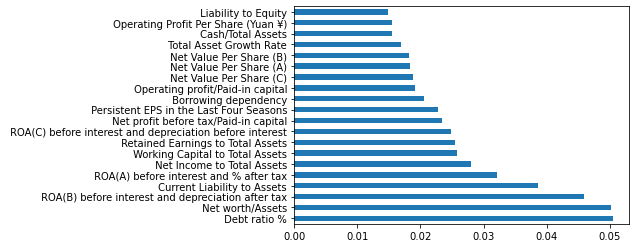

In [24]:
fimport = pd.Series(model.feature_importances_,index = X.columns)
fimport.nlargest(20).plot(kind = 'barh')
plt.show()
cols = fimport.nlargest(20).index

### Using KNN Classifier

In [25]:
from ipynb.fs.full.LearningAlg import *

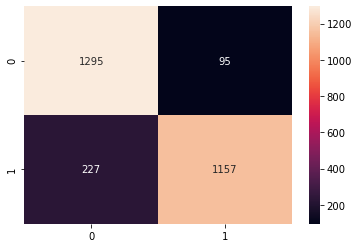

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1390
           1       0.92      0.84      0.88      1384

    accuracy                           0.88      2774
   macro avg       0.89      0.88      0.88      2774
weighted avg       0.89      0.88      0.88      2774



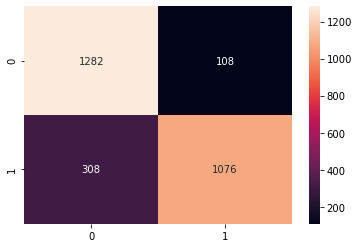

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1390
           1       0.91      0.78      0.84      1384

    accuracy                           0.85      2774
   macro avg       0.86      0.85      0.85      2774
weighted avg       0.86      0.85      0.85      2774



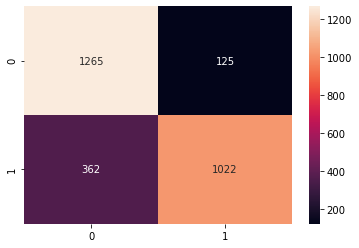

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1390
           1       0.89      0.74      0.81      1384

    accuracy                           0.82      2774
   macro avg       0.83      0.82      0.82      2774
weighted avg       0.83      0.82      0.82      2774



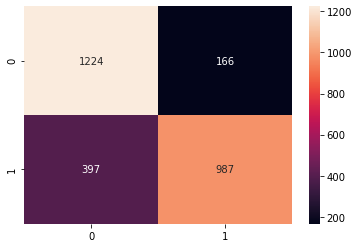

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1390
           1       0.86      0.71      0.78      1384

    accuracy                           0.80      2774
   macro avg       0.81      0.80      0.80      2774
weighted avg       0.81      0.80      0.80      2774



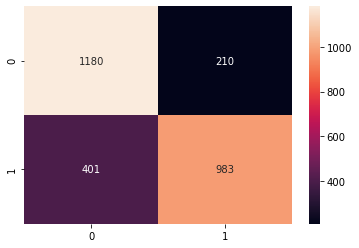

              precision    recall  f1-score   support

           0       0.75      0.85      0.79      1390
           1       0.82      0.71      0.76      1384

    accuracy                           0.78      2774
   macro avg       0.79      0.78      0.78      2774
weighted avg       0.79      0.78      0.78      2774



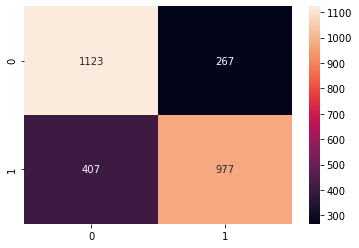

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1390
           1       0.79      0.71      0.74      1384

    accuracy                           0.76      2774
   macro avg       0.76      0.76      0.76      2774
weighted avg       0.76      0.76      0.76      2774



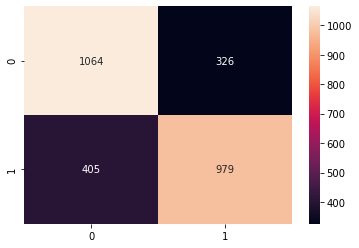

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1390
           1       0.75      0.71      0.73      1384

    accuracy                           0.74      2774
   macro avg       0.74      0.74      0.74      2774
weighted avg       0.74      0.74      0.74      2774



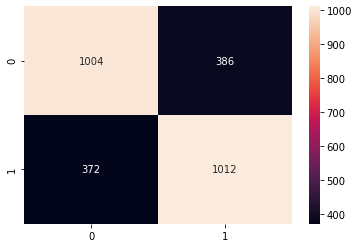

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1390
           1       0.72      0.73      0.73      1384

    accuracy                           0.73      2774
   macro avg       0.73      0.73      0.73      2774
weighted avg       0.73      0.73      0.73      2774



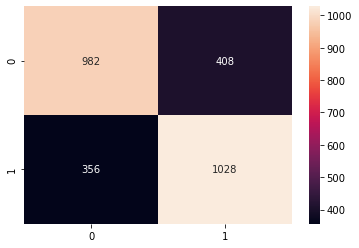

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1390
           1       0.72      0.74      0.73      1384

    accuracy                           0.72      2774
   macro avg       0.72      0.72      0.72      2774
weighted avg       0.72      0.72      0.72      2774



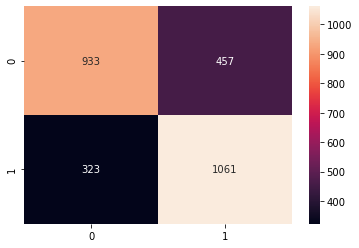

              precision    recall  f1-score   support

           0       0.74      0.67      0.71      1390
           1       0.70      0.77      0.73      1384

    accuracy                           0.72      2774
   macro avg       0.72      0.72      0.72      2774
weighted avg       0.72      0.72      0.72      2774



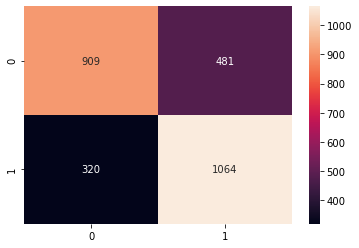

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      1390
           1       0.69      0.77      0.73      1384

    accuracy                           0.71      2774
   macro avg       0.71      0.71      0.71      2774
weighted avg       0.71      0.71      0.71      2774



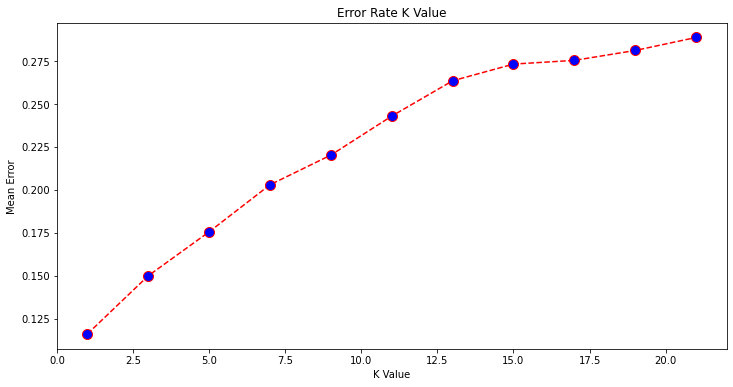

In [26]:
KNNclassifier(X_train_SMOTE[cols], y_train_SMOTE)

## Decision Trees Classifier

In [27]:
from ipynb.fs.full.LearningAlg import *

Accuracy: 0.943042537851478


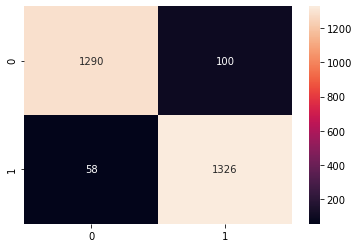

In [28]:
decisionTrees(X_train_SMOTE[cols], y_train_SMOTE)

## SVM

In [29]:
from ipynb.fs.full.LearningAlg import *

In [30]:
SVMalg(X_train_SMOTE[cols], y_train_SMOTE)

[[1047  343]
 [ 397  987]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1390
           1       0.74      0.71      0.73      1384

    accuracy                           0.73      2774
   macro avg       0.73      0.73      0.73      2774
weighted avg       0.73      0.73      0.73      2774



### Using MLP Classifier

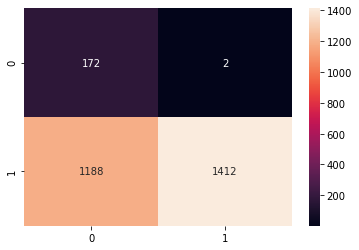

              precision    recall  f1-score   support

           0       0.99      0.13      0.22      1360
           1       0.54      1.00      0.70      1414

    accuracy                           0.57      2774
   macro avg       0.77      0.56      0.46      2774
weighted avg       0.76      0.57      0.47      2774



In [31]:
MLPclass(X_train_SMOTE[cols],y_train_SMOTE)